In [1]:
#!pip install pandas_profiling
#!pip install missingno

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import csv

from datetime import date
from datetime import datetime
import glob
import sys
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas_profiling
%matplotlib inline

In [4]:
print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__ )
print('Missingno version ' + msno.__version__)

Python version 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Numpy version 1.14.5
Pandas version 0.23.3
Matplotlib version 2.1.2
Missingno version 0.4.1


In [6]:
filelist = glob.glob('*.csv')
filelist.remove('metadata.csv')
filelist.remove('finaldata.csv')
filelist.remove('finaldata_Actual.csv')
filelist.remove('testdata_Actual.csv')
filelist.remove('testdata_S.csv')
filelist

['expedition_everest.csv',
 'rock_n_rollercoaster.csv',
 'soarin.csv',
 'splash_mountain.csv']

In [7]:
filelist[0][:-4]

'expedition_everest'

In [8]:
# For all of the filenames:
foof = {}

for filename in filelist:
    foof[filename[:-4]] = pd.read_csv(filename)

In [9]:
foof["expedition_everest"].tail()

date             datetime  SPOSTMIN  SACTMIN
228807  10/31/2018  2018-10-31 20:10:00    -999.0      NaN
228808  10/31/2018  2018-10-31 20:17:00    -999.0      NaN
228809  10/31/2018  2018-10-31 20:24:00    -999.0      NaN
228810  10/31/2018  2018-10-31 20:30:00    -999.0      NaN
228811  10/31/2018  2018-10-31 20:38:00    -999.0      NaN

In [10]:
goof = {}

for foo in foof:
    foof[foo]["date"] = pd.to_datetime(foof[foo]["date"], format="%m/%d/%Y")
    foof[foo] = foof[foo][foof[foo]["SPOSTMIN"] != -999.0]
    goof[foo] = foof[foo].groupby("date").mean().reset_index()

In [11]:
type(foof["splash_mountain"]["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
goof["splash_mountain"].tail()

date   SPOSTMIN    SACTMIN
2197 2018-10-27  32.803738  12.000000
2198 2018-10-28  12.659574  15.500000
2199 2018-10-29  47.047619   3.000000
2200 2018-10-30  20.743802  10.142857
2201 2018-10-31  15.182482  13.000000

In [13]:
metadata = pd.read_csv("metadata.csv")
metadata["DATE"] = pd.to_datetime(metadata["DATE"], format="%m/%d/%Y")
print(type(metadata["DATE"][0]))
metadata.rename(columns={"DATE" : "date"}, inplace=True)

metadata.tail()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


date WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR  \
2488  NaT               NaN        NaN        NaN         NaN          NaN   
2489  NaT               NaN        NaN        NaN         NaN          NaN   
2490  NaT               NaN        NaN        NaN         NaN          NaN   
2491  NaT               NaN        NaN        NaN         NaN          NaN   
2492  NaT               NaN        NaN        NaN         NaN          NaN   

      YEAR SEASON  HOLIDAYPX  HOLIDAYM   ...    HSFIREWKS  AKPRDDAY AKPRDDT1  \
2488   NaN    NaN        NaN       NaN   ...          NaN       NaN      NaN   
2489   NaN    NaN        NaN       NaN   ...          NaN       NaN      NaN   
2490   NaN    NaN        NaN       NaN   ...          NaN       NaN      NaN   
2491   NaN    NaN        NaN       NaN   ...          NaN       NaN      NaN   
2492   NaN    NaN        NaN       NaN   ...          NaN       NaN      NaN   

     AKPRDDT2 AKPRDDN  AKFIREN  AKSHWNGT AKSHWNT1  AKSHWNT2  AKSHWNN  
2488      NaN     NaN      NaN       NaN      NaN       NaN      NaN  
2489      NaN     NaN      NaN       NaN      NaN       NaN      NaN  
2490      NaN     NaN      NaN       NaN      NaN       NaN      NaN  
2491      NaN     NaN      NaN       NaN      NaN       NaN      NaN  
2492      NaN     NaN      NaN       NaN      NaN       NaN      NaN  

[5 rows x 190 columns]

In [14]:
maxdate = metadata["date"].max()
mindate = "01/01/2015"
print(maxdate)
mask = (metadata['date'] >= mindate) & (metadata['date'] <= maxdate)

2018-07-31 00:00:00


In [15]:
metadata = metadata.loc[mask]
metadata

date WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
1095 2015-01-01               NaN        5.0        0.0         0.0   
1096 2015-01-02               NaN        6.0        1.0         0.0   
1097 2015-01-03               NaN        7.0        2.0         0.0   
1098 2015-01-04               NaN        1.0        3.0         1.0   
1099 2015-01-05               NaN        2.0        4.0         1.0   
1100 2015-01-06               NaN        3.0        5.0         1.0   
1101 2015-01-07               NaN        4.0        6.0         1.0   
1102 2015-01-08               NaN        5.0        7.0         1.0   
1103 2015-01-09               NaN        6.0        8.0         1.0   
1104 2015-01-10               NaN        7.0        9.0         1.0   
1105 2015-01-11               NaN        1.0       10.0         2.0   
1106 2015-01-12               NaN        2.0       11.0         2.0   
1107 2015-01-13               NaN        3.0       12.0         2.0   
1108 2015-01-14               NaN        4.0       13.0         2.0   
1109 2015-01-15               NaN        5.0       14.0         2.0   
1110 2015-01-16               NaN        6.0       15.0         2.0   
1111 2015-01-17               NaN        7.0       16.0         2.0   
1112 2015-01-18               NaN        1.0       17.0         3.0   
1113 2015-01-19               NaN        2.0       18.0         3.0   
1114 2015-01-20               NaN        3.0       19.0         3.0   
1115 2015-01-21               NaN        4.0       20.0         3.0   
1116 2015-01-22               NaN        5.0       21.0         3.0   
1117 2015-01-23               NaN        6.0       22.0         3.0   
1118 2015-01-24               NaN        7.0       23.0         3.0   
1119 2015-01-25               NaN        1.0       24.0         4.0   
1120 2015-01-26               NaN        2.0       25.0         4.0   
1121 2015-01-27               NaN        3.0       26.0         4.0   
1122 2015-01-28               NaN        4.0       27.0         4.0   
1123 2015-01-29               NaN        5.0       28.0         4.0   
1124 2015-01-30               NaN        6.0       29.0         4.0   
...         ...               ...        ...        ...         ...   
2371 2018-07-02              peak        2.0      182.0        26.0   
2372 2018-07-03              peak        3.0      183.0        26.0   
2373 2018-07-04              peak        4.0      184.0        26.0   
2374 2018-07-05           regular        5.0      185.0        26.0   
2375 2018-07-06           regular        6.0      186.0        26.0   
2376 2018-07-07           regular        7.0      187.0        26.0   
2377 2018-07-08           regular        1.0      188.0        27.0   
2378 2018-07-09           regular        2.0      189.0        27.0   
2379 2018-07-10           regular        3.0      190.0        27.0   
2380 2018-07-11           regular        4.0      191.0        27.0   
2381 2018-07-12           regular        5.0      192.0        27.0   
2382 2018-07-13           regular        6.0      193.0        27.0   
2383 2018-07-14           regular        7.0      194.0        27.0   
2384 2018-07-15           regular        1.0      195.0        28.0   
2385 2018-07-16           regular        2.0      196.0        28.0   
2386 2018-07-17           regular        3.0      197.0        28.0   
2387 2018-07-18           regular        4.0      198.0        28.0   
2388 2018-07-19           regular        5.0      199.0        28.0   
2389 2018-07-20           regular        6.0      200.0        28.0   
2390 2018-07-21           regular        7.0      201.0        28.0   
2391 2018-07-22           regular        1.0      202.0        29.0   
2392 2018-07-23           regular        2.0      203.0        29.0   
2393 2018-07-24           regular        3.0      204.0        29.0   
2394 2018-07-25           regular        4.0      205.0        29.0   
2395 2018-07-26           regular  

In [16]:
moof = {}
for goo in goof:
    mask = (goof[goo]['date'] >= mindate) & (goof[goo]['date'] <= maxdate)
    goof[goo] = goof[goo].loc[mask]
    print(goo)
    
    print(goof[goo].head())
    moof[goo] = pd.merge(goof[goo], metadata, on = "date")


expedition_everest
           date   SPOSTMIN    SACTMIN
1094 2015-01-01  40.268817  10.500000
1095 2015-01-02  34.198113   5.500000
1096 2015-01-03  29.793814  24.333333
1097 2015-01-04  23.850000  25.000000
1098 2015-01-05  26.956522   3.000000
rock_n_rollercoaster
           date   SPOSTMIN  SACTMIN
1095 2015-01-01  74.717742     41.2
1096 2015-01-02  80.080645     26.0
1097 2015-01-03  88.222222     30.0
1098 2015-01-04   5.000000      NaN
1099 2015-01-05  62.321429     21.0
soarin
           date   SPOSTMIN    SACTMIN
1095 2015-01-01  89.814815  61.000000
1096 2015-01-02  82.389706  24.333333
1097 2015-01-03  73.443396        NaN
1098 2015-01-04  58.069307        NaN
1099 2015-01-05  58.437500        NaN
splash_mountain
          date   SPOSTMIN    SACTMIN
941 2015-01-01  28.156028  11.500000
942 2015-01-02  44.014085   1.000000
943 2015-01-03  43.198529  37.333333
944 2015-01-04  30.992063  16.000000
945 2015-01-31   6.724138        NaN


In [17]:
print(filelist[1])
moof[filelist[1][:-4]].head()

rock_n_rollercoaster.csv


date   SPOSTMIN  SACTMIN WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  \
0 2015-01-01  74.717742     41.2               NaN        5.0        0.0   
1 2015-01-02  80.080645     26.0               NaN        6.0        1.0   
2 2015-01-03  88.222222     30.0               NaN        7.0        2.0   
3 2015-01-04   5.000000      NaN               NaN        1.0        3.0   
4 2015-01-05  62.321429     21.0               NaN        2.0        4.0   

   WEEKOFYEAR  MONTHOFYEAR    YEAR          SEASON   ...    HSFIREWKS  \
0         0.0          1.0  2015.0  CHRISTMAS PEAK   ...          1.0   
1         0.0          1.0  2015.0       CHRISTMAS   ...          1.0   
2         0.0          1.0  2015.0       CHRISTMAS   ...          1.0   
3         1.0          1.0  2015.0       CHRISTMAS   ...          1.0   
4         1.0          1.0  2015.0       CHRISTMAS   ...          1.0   

   AKPRDDAY AKPRDDT1  AKPRDDT2 AKPRDDN AKFIREN AKSHWNGT  AKSHWNT1  AKSHWNT2  \
0       0.0      NaN       NaN     NaN     NaN      0.0       NaN       NaN   
1       0.0      NaN       NaN     NaN     NaN      0.0       NaN       NaN   
2       0.0      NaN       NaN     NaN     NaN      0.0       NaN       NaN   
3       0.0      NaN       NaN     NaN     NaN      0.0       NaN       NaN   
4       0.0      NaN       NaN     NaN     NaN      0.0       NaN       NaN   

  AKSHWNN  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 192 columns]

In [18]:
moof[filelist[1][:-4]].tail()

date   SPOSTMIN  SACTMIN WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  \
1285 2018-07-27  65.566667     5.60           regular        6.0      207.0   
1286 2018-07-28  46.726619     7.00           regular        7.0      208.0   
1287 2018-07-29  45.856164     1.00           regular        1.0      209.0   
1288 2018-07-30  46.493056      NaN           regular        2.0      210.0   
1289 2018-07-31  46.851852    11.75           regular        3.0      211.0   

      WEEKOFYEAR  MONTHOFYEAR    YEAR        SEASON       ...         \
1285        29.0          7.0  2018.0  SUMMER BREAK       ...          
1286        29.0          7.0  2018.0  SUMMER BREAK       ...          
1287        30.0          7.0  2018.0  SUMMER BREAK       ...          
1288        30.0          7.0  2018.0  SUMMER BREAK       ...          
1289        30.0          7.0  2018.0  SUMMER BREAK       ...          

      HSFIREWKS  AKPRDDAY AKPRDDT1  AKPRDDT2 AKPRDDN AKFIREN AKSHWNGT  \
1285        1.0       0.0      NaN       NaN     NaN     NaN      2.0   
1286        1.0       0.0      NaN       NaN     NaN     NaN      2.0   
1287        1.0       0.0      NaN       NaN     NaN     NaN      2.0   
1288        1.0       0.0      NaN       NaN     NaN     NaN      2.0   
1289        1.0       0.0      NaN       NaN     NaN     NaN      2.0   

      AKSHWNT1  AKSHWNT2          AKSHWNN  
1285     21:15     22:15  Rivers of Light  
1286     21:15     22:15  Rivers of Light  
1287     21:15     22:15  Rivers of Light  
1288     21:15     22:15  Rivers of Light  
1289     21:15     22:15  Rivers of Light  

[5 rows x 192 columns]

In [19]:
moof[filelist[1][:-4]]

date   SPOSTMIN    SACTMIN WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  \
0    2015-01-01  74.717742  41.200000               NaN        5.0        0.0   
1    2015-01-02  80.080645  26.000000               NaN        6.0        1.0   
2    2015-01-03  88.222222  30.000000               NaN        7.0        2.0   
3    2015-01-04   5.000000        NaN               NaN        1.0        3.0   
4    2015-01-05  62.321429  21.000000               NaN        2.0        4.0   
5    2015-01-06  61.428571  11.000000               NaN        3.0        5.0   
6    2015-01-07  64.666667  36.000000               NaN        4.0        6.0   
7    2015-01-08  55.101010  29.666667               NaN        5.0        7.0   
8    2015-01-09  60.476190  42.000000               NaN        6.0        8.0   
9    2015-01-10  54.087591  40.333333               NaN        7.0        9.0   
10   2015-01-11  37.462687  11.400000               NaN        1.0       10.0   
11   2015-01-12  45.527950  18.333333               NaN        2.0       11.0   
12   2015-01-13  40.261194  34.250000               NaN        3.0       12.0   
13   2015-01-14  35.196850        NaN               NaN        4.0       13.0   
14   2015-01-15  33.063063  34.000000               NaN        5.0       14.0   
15   2015-01-16  42.727273  28.666667               NaN        6.0       15.0   
16   2015-01-17  86.032258  20.500000               NaN        7.0       16.0   
17   2015-01-18  70.076923  47.000000               NaN        1.0       17.0   
18   2015-01-19  67.980132  26.333333               NaN        2.0       18.0   
19   2015-01-20  75.986842  72.000000               NaN        3.0       19.0   
20   2015-01-21  45.071942        NaN               NaN        4.0       20.0   
21   2015-01-22  47.560000  32.750000               NaN        5.0       21.0   
22   2015-01-23  42.642276  29.666667               NaN        6.0       22.0   
23   2015-01-24  47.913669   6.000000               NaN        7.0       23.0   
24   2015-01-25  57.250000  13.666667               NaN        1.0       24.0   
25   2015-01-26  34.909091  20.100000               NaN        2.0       25.0   
26   2015-01-27  49.160584  12.000000               NaN        3.0       26.0   
27   2015-01-28  54.545455  16.000000               NaN        4.0       27.0   
28   2015-01-29  39.078947        NaN               NaN        5.0       28.0   
29   2015-01-30  65.590551  64.000000               NaN        6.0       29.0   
...         ...        ...        ...               ...        ...        ...   
1260 2018-07-02  74.522059  80.000000              peak        2.0      182.0   
1261 2018-07-03  72.200000  76.333333              peak        3.0      183.0   
1262 2018-07-04  55.325203  62.000000              peak        4.0      184.0   
1263 2018-07-05  69.137931  35.000000           regular        5.0      185.0   
1264 2018-07-06  61.353383  21.250000           regular        6.0      186.0   
1265 2018-07-07  41.423841  25.000000           regular        7.0      187.0   
1266 2018-07-08  47.655172        NaN           regular        1.0      188.0   
1267 2018-07-09  51.818182        NaN           regular        2.0      189.0   
1268 2018-07-10  55.206897  47.500000           regular        3.0      190.0   
1269 2018-07-11  47.123288  20.333333           regular        4.0      191.0   
1270 2018-07-12  51.487603   7.000000           regular        5.0      192.0   
1271 2018-07-13  74.233333  13.000000           regular        6.0      193.0   
1272 2018-07-14  43.308271        NaN           regular        7.0      194.0   
1273 2018-07-15  40.369128  13.333333           regular        1.0      195.0   
1274 2018-07-16  46.360544  30.000000           regular        2.0      196.0   
1275 2018-07-17  54.629630  13.000000           regular        3.0      197.0   
1276 2018-07-18  64.897260  41.333333           regular        4.0      198.0   
1277 2018-07-19  60.283688  20.500000     

In [20]:
######THIS STEP IS NOW LOOKING AT MISSING DATA IN META DATA######

In [21]:
moof[filelist[1][:-4]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 0 to 1289
Columns: 192 entries, date to AKSHWNN
dtypes: datetime64[ns](1), float64(97), object(94)
memory usage: 1.9+ MB


In [22]:
moof[filelist[1][:-4]].isnull().sum()

date                    0
SPOSTMIN                1
SACTMIN               228
WDW_TICKET_SEASON     422
DAYOFWEEK               0
DAYOFYEAR               0
WEEKOFYEAR              0
MONTHOFYEAR             0
YEAR                    0
SEASON                  0
HOLIDAYPX               0
HOLIDAYM                0
HOLIDAYN             1160
HOLIDAY                 0
WDWTICKETSEASON       422
WDWRaceN             1236
WDWeventN            1228
WDWevent                0
WDWrace                 0
WDWSEASON               0
WDWMAXTEMP              5
WDWMINTEMP              6
WDWMEANTEMP             6
MKeventN             1037
MKevent                 0
EPeventN              667
EPevent                 0
HSeventN             1227
HSevent                 0
AKeventN             1276
                     ... 
MKPRDNN               643
MKFIREWK                0
MKFIRET1                8
MKFIRET2             1284
MKFIREN                 8
EPFIREWK                0
EPFIRET1                2
EPFIRET2    

In [23]:
moof[filelist[1][:-4]].notnull().sum()

date                 1290
SPOSTMIN             1289
SACTMIN              1062
WDW_TICKET_SEASON     868
DAYOFWEEK            1290
DAYOFYEAR            1290
WEEKOFYEAR           1290
MONTHOFYEAR          1290
YEAR                 1290
SEASON               1290
HOLIDAYPX            1290
HOLIDAYM             1290
HOLIDAYN              130
HOLIDAY              1290
WDWTICKETSEASON       868
WDWRaceN               54
WDWeventN              62
WDWevent             1290
WDWrace              1290
WDWSEASON            1290
WDWMAXTEMP           1285
WDWMINTEMP           1284
WDWMEANTEMP          1284
MKeventN              253
MKevent              1290
EPeventN              623
EPevent              1290
HSeventN               63
HSevent              1290
AKeventN               14
                     ... 
MKPRDNN               647
MKFIREWK             1290
MKFIRET1             1282
MKFIRET2                6
MKFIREN              1282
EPFIREWK             1290
EPFIRET1             1288
EPFIRET2    

In [27]:
profile = pandas_profiling.ProfileReport(moof[filelist[1][:-4]])
profile.to_file(outputfile="Pandas_profiliing.html")
profile

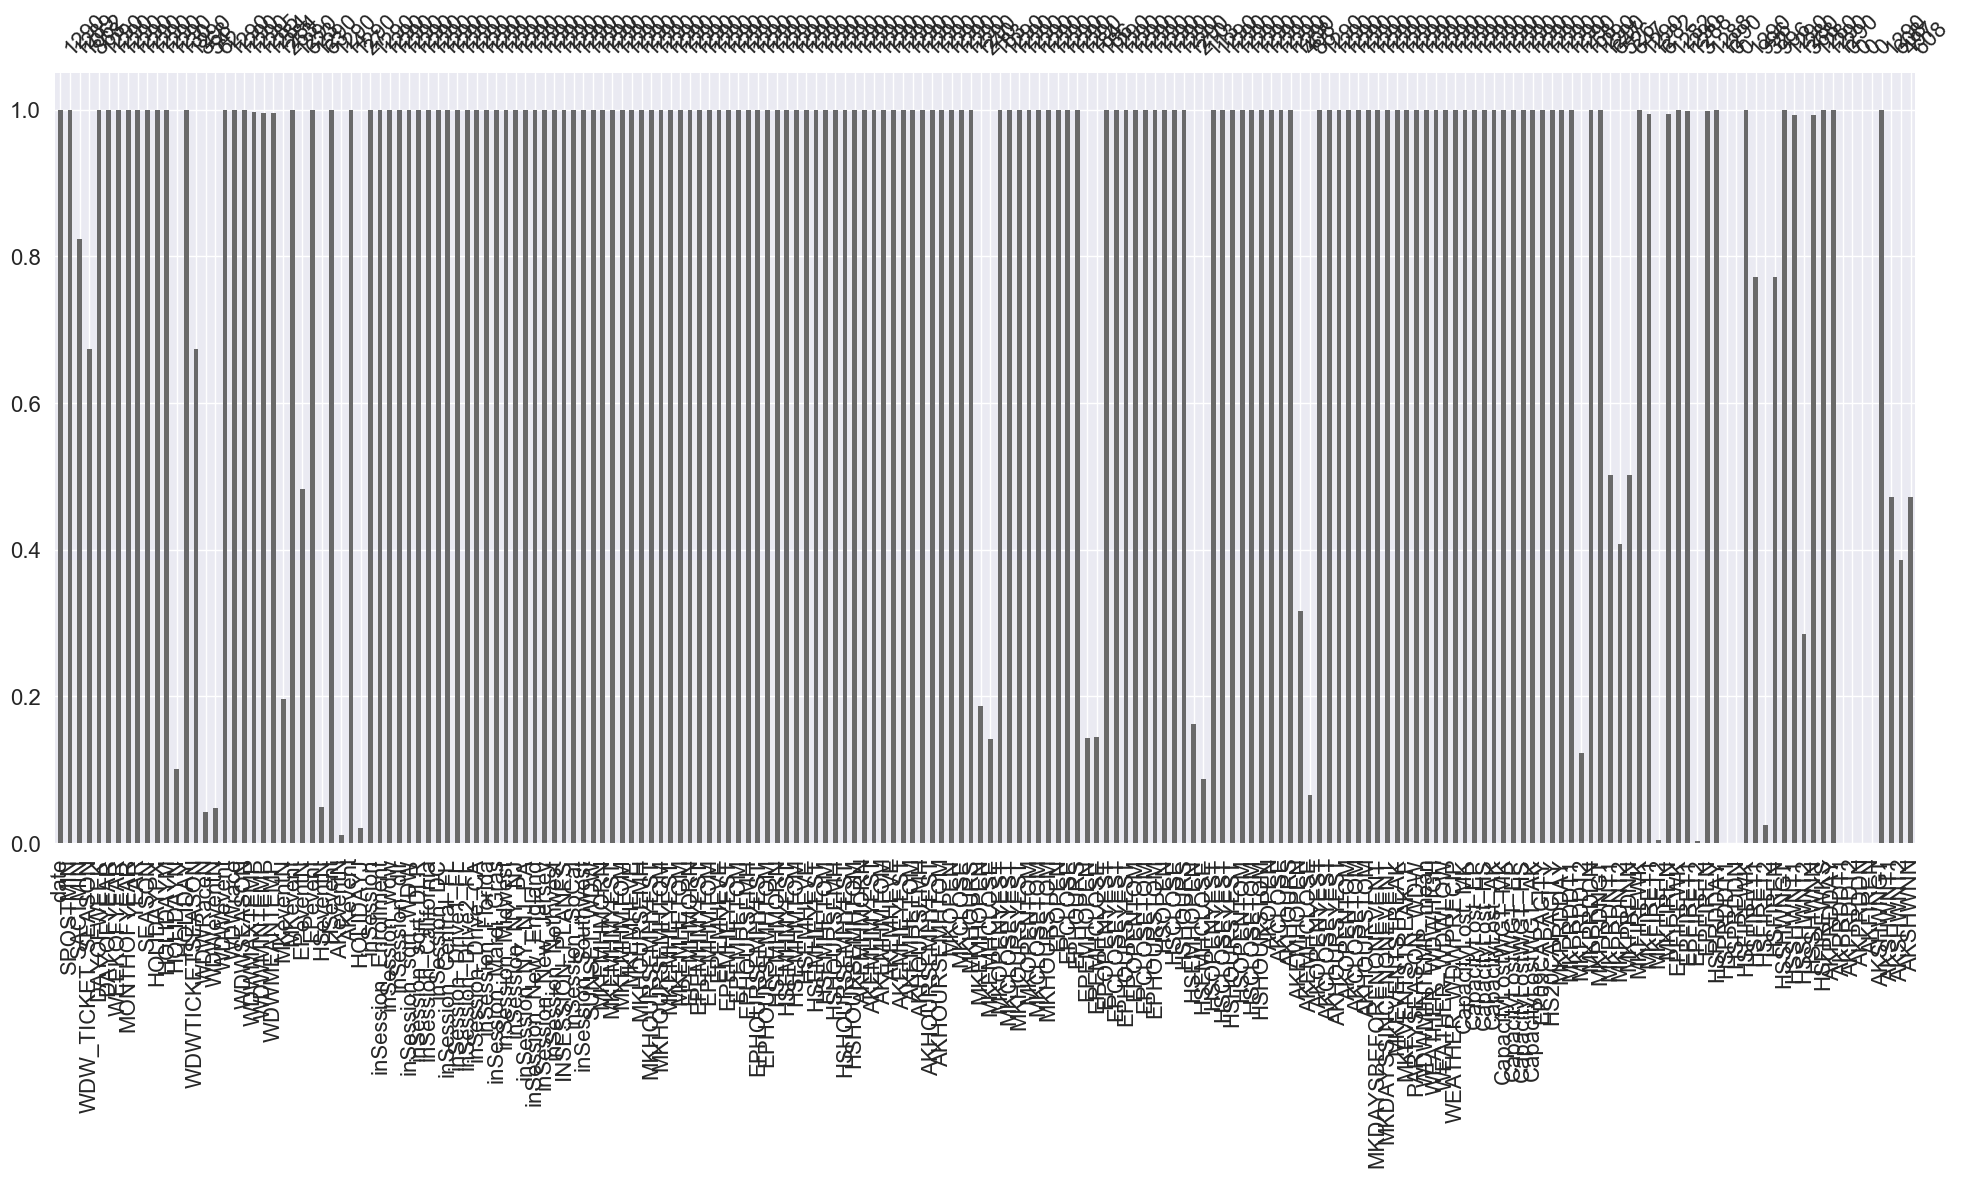

In [25]:
msno.bar(moof[filelist[1][:-4]].sample(1290))

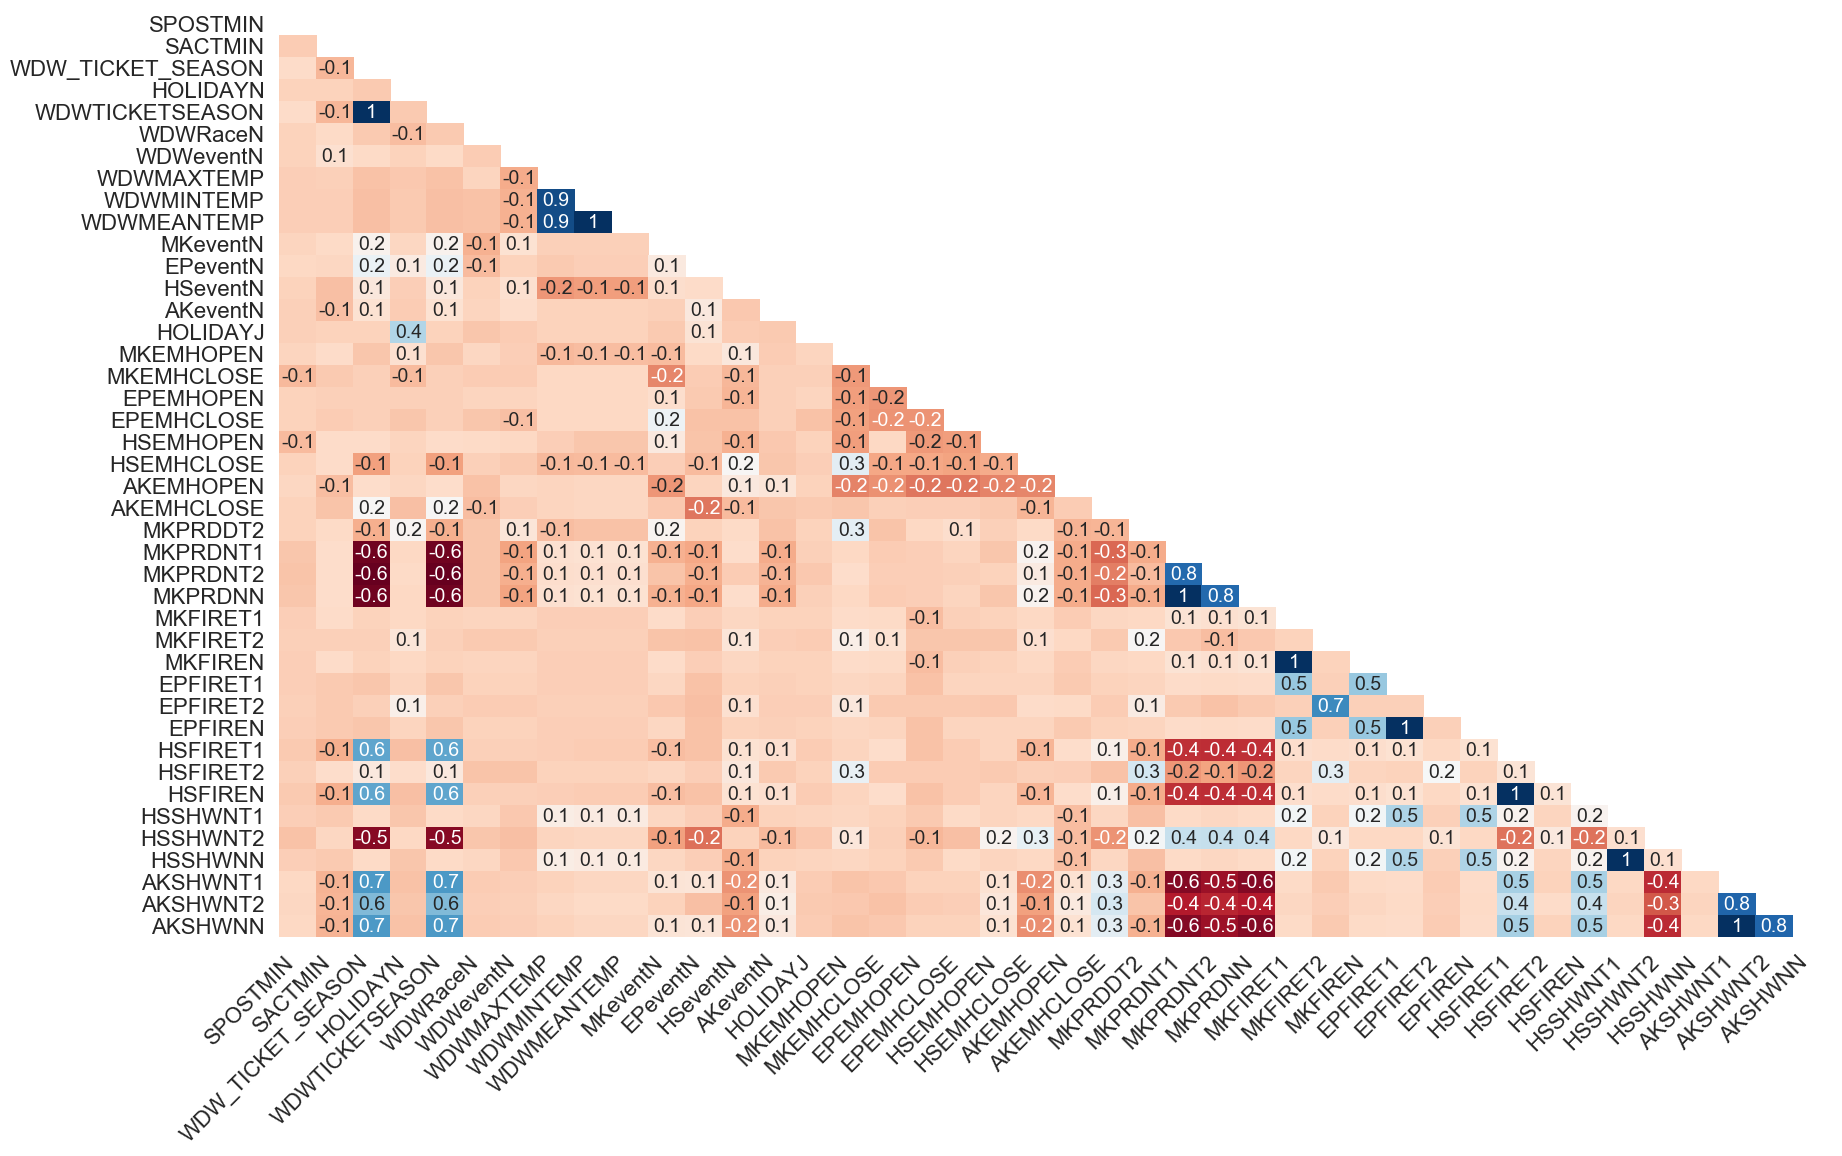

In [66]:
msno.heatmap(moof[filelist[1][:-4]])

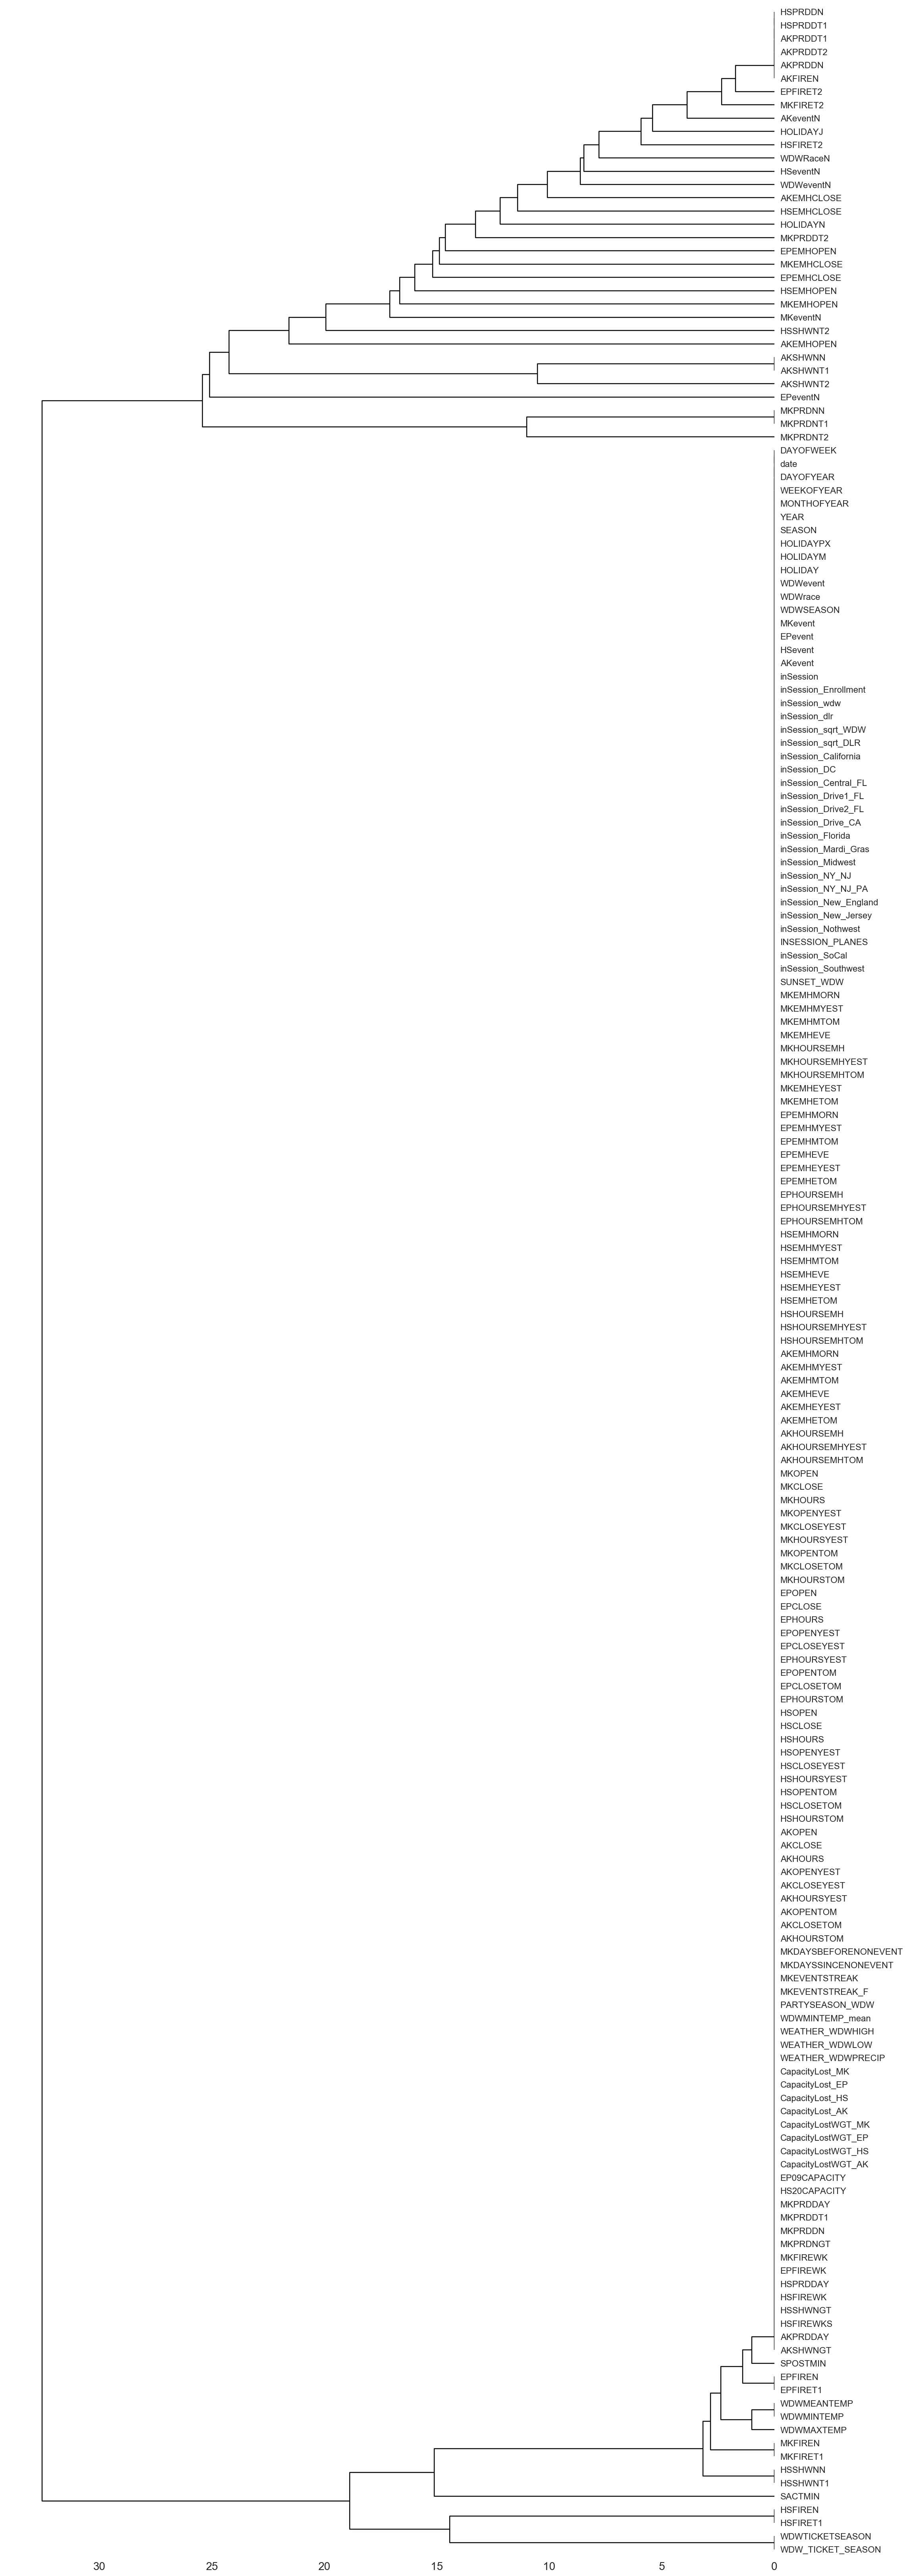

In [67]:
msno.dendrogram(moof[filelist[1][:-4]])

In [68]:
delete = ['date', 'AKFIREN', 'AKPRDDAY', 'AKPRDDN', 'AKPRDDT1', 'AKPRDDT2', 'HSPRDDN', 'HSPRDDT1', 'HSFIREWKS', 'HSPRDDAY', 'HSPRDDN', \
          'inSession_SoCal', 'AKEMHETOM', 'AKEMHEYEST', 'WEEKOFYEAR', \
          'WDW_TICKET_SEASON', 'HOLIDAYN', 'HOLIDAYJ', 'WDW_TICKET_SEASON','WDWRaceN', 'WDWeventN', 'WDWSEASON', 'MKeventN',\
          'EPeventN', 'HSeventN', 'AKeventN', 'AKeventN', 'MKEMHOPEN', 'MKEMHCLOSE', 'EPEMHOPEN', 'EPEMHCLOSE', 'HSEMHOPEN', \
          'HSEMHCLOSE','AKEMHOPEN','AKEMHCLOSE', 'MKPRDNT1', 'MKPRDNT2', 'MKPRDNN', 'MKFIRET2', 'EPFIRET2', 'HSFIRET1',\
          'HSFIRET2', 'HSFIREN', 'HSSHWNT2', 'AKSHWNT1', 'AKSHWNT2', 'AKSHWNN', 'MKPRDDT2', "WDWTICKETSEASON", 'MKFIRET1',\
          'MKFIREN', 'EPFIRET1', 'EPFIREN', 'HSSHWNT1', 'HSSHWNN']
for moo in moof:
    moof[moo] = moof[moo].drop(delete, axis=1)

In [69]:
print(len(list(moof[moo].columns)))

140


In [70]:
for moo in moof:
    moof[moo] = moof[moo][np.isfinite(moof[moo]['SACTMIN'])]

In [71]:
moof[moo]

SPOSTMIN    SACTMIN  DAYOFWEEK  DAYOFYEAR  MONTHOFYEAR    YEAR  \
0     28.156028  11.500000        5.0        0.0          1.0  2015.0   
1     44.014085   1.000000        6.0        1.0          1.0  2015.0   
2     43.198529  37.333333        7.0        2.0          1.0  2015.0   
3     30.992063  16.000000        1.0        3.0          1.0  2015.0   
5     16.721311  11.400000        1.0       31.0          2.0  2015.0   
7     14.233333   2.500000        3.0       33.0          2.0  2015.0   
8     13.129032   5.000000        4.0       34.0          2.0  2015.0   
9      5.680000   3.000000        5.0       35.0          2.0  2015.0   
10    20.843023  14.000000        6.0       36.0          2.0  2015.0   
11    18.341709  31.000000        7.0       37.0          2.0  2015.0   
12    19.365079  14.500000        1.0       38.0          2.0  2015.0   
13     9.594595   3.000000        2.0       39.0          2.0  2015.0   
15    13.545455  14.500000        4.0       41.0          2.0  2015.0   
16    21.949686  15.500000        5.0       42.0          2.0  2015.0   
17    16.016043   3.500000        6.0       43.0          2.0  2015.0   
20    34.338624  14.200000        2.0       46.0          2.0  2015.0   
22    18.316327  14.000000        4.0       48.0          2.0  2015.0   
24     9.587912  15.000000        6.0       50.0          2.0  2015.0   
25    20.386598  18.500000        7.0       51.0          2.0  2015.0   
26    28.502825  35.000000        1.0       52.0          2.0  2015.0   
27    25.696970  39.000000        2.0       53.0          2.0  2015.0   
28    17.329545  18.666667        3.0       54.0          2.0  2015.0   
29    13.478261  12.666667        4.0       55.0          2.0  2015.0   
30    10.671141   8.333333        5.0       56.0          2.0  2015.0   
31     5.638298   1.000000        6.0       57.0          2.0  2015.0   
32     7.670455   3.000000        7.0       58.0          2.0  2015.0   
33    25.789474  19.250000        1.0       59.0          3.0  2015.0   
34    27.542373  21.500000        2.0       60.0          3.0  2015.0   
35    26.506410  17.000000        3.0       61.0          3.0  2015.0   
36    16.554878  11.000000        4.0       62.0          3.0  2015.0   
...         ...        ...        ...        ...          ...     ...   
1129  67.083333  48.000000        6.0      172.0          6.0  2018.0   
1130  67.366071  13.500000        7.0      173.0          6.0  2018.0   
1131  59.072581  22.250000        1.0      174.0          6.0  2018.0   
1132  79.854015  15.000000        2.0      175.0          6.0  2018.0   
1133  72.703704  58.000000        3.0      176.0          6.0  2018.0   
1134  73.795620  46.000000        4.0      177.0          6.0  2018.0   
1136  63.876404  18.000000        6.0      179.0          6.0  2018.0   
1137  38.811475  10.500000        7.0      180.0          6.0  2018.0   
1138  52.796610   9.000000        1.0      181.0          7.0  2018.0   
1140  69.210526   3.000000        3.0      183.0          7.0  2018.0   
1141  70.887097  13.000000        4.0      184.0          7.0  2018.0   
1142  70.275591  48.000000        5.0      185.0          7.0  2018.0   
1143  56.296296  31.000000        6.0      186.0          7.0  2018.0   
1144  45.625000  11.750000        7.0      187.0          7.0  2018.0   
1145  47.892157  33.500000        1.0      188.0          7.0  2018.0   
1146  70.595238  46.000000        2.0      189.0          7.0  2018.0   
1147  69.205607  29.500000        3.0      190.0          7.0  2018.0   
1149  61.386555  36.000000        5.0      192.0          7.0  2018.0   
1150  63.225806  29.000000        6.0      193.0          7.0  2018.0   
1151  49.909910  10.000000        7.0      194.0          7.0  2018.0   
1152  52.698413  35.600000        1.0      195.0          7.0  2018.0   
1154  69.072581  23.000000        3.0      197.0          7.0  2018.0   
1156  67.317073  30.666667        5.0      199.0          7.0  20

In [72]:
for moo in moof:
    print(moo)
    print(moof[moo].shape)
    missingIndex = set()
    for i in moof[moo].columns:
        if sum(pd.isna(moof[moo][i])) > 0:
            missingIndex.update(moof[moo].index[pd.isna(moof[moo][i])])
            print(i, sum(pd.isna(moof[moo][i])))
    for i in moof[moo].columns:
        moof[moo] = moof[moo][pd.notna(moof[moo][i])]
    print(len(missingIndex))
    print(moof[moo].shape)

expedition_everest
(1100, 140)
SPOSTMIN 1
WDWMAXTEMP 5
WDWMINTEMP 6
WDWMEANTEMP 6
7
(1093, 140)
rock_n_rollercoaster
(1062, 140)
SPOSTMIN 1
WDWMAXTEMP 4
WDWMINTEMP 5
WDWMEANTEMP 5
6
(1056, 140)
soarin
(1016, 140)
WDWMAXTEMP 4
WDWMINTEMP 5
WDWMEANTEMP 5
5
(1011, 140)
splash_mountain
(975, 140)
WDWMAXTEMP 4
WDWMINTEMP 4
WDWMEANTEMP 4
4
(971, 140)


In [73]:
doof = {}
for moo in moof:
    print(moo)
    print(moof[moo].isna().sum().sum())
    doof[moo] = moof[moo].drop(["SPOSTMIN"], axis = 1)

expedition_everest
0
rock_n_rollercoaster
0
soarin
0
splash_mountain
0


In [74]:
doof["splash_mountain"]

SACTMIN  DAYOFWEEK  DAYOFYEAR  MONTHOFYEAR    YEAR           SEASON  \
0     11.500000        5.0        0.0          1.0  2015.0   CHRISTMAS PEAK   
1      1.000000        6.0        1.0          1.0  2015.0        CHRISTMAS   
2     37.333333        7.0        2.0          1.0  2015.0        CHRISTMAS   
3     16.000000        1.0        3.0          1.0  2015.0        CHRISTMAS   
5     11.400000        1.0       31.0          2.0  2015.0           WINTER   
7      2.500000        3.0       33.0          2.0  2015.0           WINTER   
8      5.000000        4.0       34.0          2.0  2015.0           WINTER   
9      3.000000        5.0       35.0          2.0  2015.0           WINTER   
10    14.000000        6.0       36.0          2.0  2015.0           WINTER   
11    31.000000        7.0       37.0          2.0  2015.0           WINTER   
12    14.500000        1.0       38.0          2.0  2015.0           WINTER   
13     3.000000        2.0       39.0          2.0  2015.0           WINTER   
15    14.500000        4.0       41.0          2.0  2015.0           WINTER   
16    15.500000        5.0       42.0          2.0  2015.0  PRESIDENTS WEEK   
17     3.500000        6.0       43.0          2.0  2015.0  PRESIDENTS WEEK   
20    14.200000        2.0       46.0          2.0  2015.0  PRESIDENTS WEEK   
22    14.000000        4.0       48.0          2.0  2015.0  PRESIDENTS WEEK   
24    15.000000        6.0       50.0          2.0  2015.0  PRESIDENTS WEEK   
25    18.500000        7.0       51.0          2.0  2015.0  PRESIDENTS WEEK   
26    35.000000        1.0       52.0          2.0  2015.0  PRESIDENTS WEEK   
27    39.000000        2.0       53.0          2.0  2015.0           WINTER   
28    18.666667        3.0       54.0          2.0  2015.0           WINTER   
29    12.666667        4.0       55.0          2.0  2015.0           WINTER   
30     8.333333        5.0       56.0          2.0  2015.0           WINTER   
31     1.000000        6.0       57.0          2.0  2015.0           WINTER   
32     3.000000        7.0       58.0          2.0  2015.0           WINTER   
33    19.250000        1.0       59.0          3.0  2015.0           SPRING   
34    21.500000        2.0       60.0          3.0  2015.0           SPRING   
35    17.000000        3.0       61.0          3.0  2015.0           SPRING   
36    11.000000        4.0       62.0          3.0  2015.0           SPRING   
...         ...        ...        ...          ...     ...              ...   
1129  48.000000        6.0      172.0          6.0  2018.0           SPRING   
1130  13.500000        7.0      173.0          6.0  2018.0           SPRING   
1131  22.250000        1.0      174.0          6.0  2018.0           SPRING   
1132  15.000000        2.0      175.0          6.0  2018.0           SPRING   
1133  58.000000        3.0      176.0          6.0  2018.0           SPRING   
1134  46.000000        4.0      177.0          6.0  2018.0           SPRING   
1136  18.000000        6.0      179.0          6.0  2018.0           SPRING   
1137  10.500000        7.0      180.0          6.0  2018.0           SPRING   
1138   9.000000        1.0      181.0          7.0  2018.0     SUMMER BREAK   
1140   3.000000        3.0      183.0          7.0  2018.0         JULY 4TH   
1141  13.000000        4.0      184.0          7.0  2018.0         JULY 4TH   
1142  48.000000        5.0      185.0          7.0  2018.0         JULY 4TH   
1143  31.000000        6.0      186.0          7.0  2018.0         JULY 4TH   
1144  11.750000        7.0      187.0          7.0  2018.0     SUMMER BREAK   
1145  33.500000        1.0      188.0          7.0  2018.0     SUMMER BREAK   
1146  46.000000        2.0      189.0          7.0  2018.0     SUMMER BREAK   
1147  29.500000        3.0      190.0          7.0  2018.0     SUMMER BREAK   
1149  36.000000        5.0      192.0          7.0  2018.0     SUMMER BREAK   
1150  29.000000        6.0      193.0          7.0  2018.0

In [75]:
for doo in doof:
    doof[doo].to_csv(f'Resources/{doo}.csv', index = False)

In [76]:
pd.options.display.max_columns = None